# PageRank 

### Use this cell for all your imports

In [10]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
import numpy as np
from scipy.sparse import coo_matrix

### You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

The given code loads integer data from "data.txt" file by ignoring the first two rows and comments and interpreting tab-separated values as integers. The resulting data is stored in a numpy array named "data".

In [14]:
# Load data from file
data = np.loadtxt("data.txt", comments="#", delimiter="\t", dtype=int, unpack=False, skiprows=2)
data

array([[   1001, 9304045],
       [   1001, 9308122],
       [   1001, 9309097],
       ...,
       [9912286, 9808140],
       [9912286, 9810068],
       [9912286, 9901023]])

We create an adjacency matrix using the data in "data". The matrix is constructed using the elements of the first column of "data" as row indices, and the elements of the second column as column indices. The code can also create an adjacency matrix with the values in "data" and set each element to 1; the first column is used for row indices, while the second column is used for column indices.

In [23]:
# Create the adjacency matrix
adj_matrix = coo_matrix((np.ones(data.shape[0]), (data[:, 0], data[:, 1])))

### Use this cell to normalize the matrix as you see fit.

We normalize the adjacency matrix by multiplying it with the inverse row sum.

In [31]:
rowsum = np.array(adj_matrix.sum(axis=1)).flatten()# Calculate row sums of the adjacency matrix
rowsum[rowsum == 0] = 1# Set any zero values to 1 to avoid divide-by-zero errors
normalized_matrix = adj_matrix.multiply(1 / rowsum).tocsr()# Normalize the adjacency matrix by multiplying it with the inverse row sum
print(normalized_matrix)

  (1001, 9304045)	1.0
  (1001, 9308122)	0.14285714285714285
  (1001, 9309097)	0.25
  (1001, 9311042)	0.5
  (1001, 9401139)	0.025
  (1001, 9404151)	0.5
  (1001, 9407087)	0.1111111111111111
  (1001, 9408099)	0.14285714285714285
  (1001, 9501030)	0.037037037037037035
  (1001, 9503124)	0.1
  (1001, 9504090)	0.25
  (1001, 9504145)	0.5
  (1001, 9505025)	0.07142857142857142
  (1001, 9505054)	0.1
  (1001, 9505105)	0.047619047619047616
  (1001, 9505162)	0.04
  (1001, 9506048)	0.14285714285714285
  (1001, 9506112)	0.058823529411764705
  (1001, 9506144)	0.06666666666666667
  (1001, 9507050)	0.05263157894736842
  (1001, 9507158)	0.0625
  (1001, 9508094)	0.034482758620689655
  (1001, 9508155)	0.018867924528301886
  (1001, 9510142)	0.03571428571428571
  (1001, 9510225)	0.045454545454545456
  :	:
  (9912291, 9802149)	1.0
  (9912291, 9908149)	0.029411764705882353
  (9912291, 9912102)	0.5
  (9912292, 9406217)	1.0
  (9912292, 9606139)	0.038461538461538464
  (9912292, 9608177)	0.25
  (9912292, 9702163)	0

### Apply the PageRank algorithm to the matrix you created.

This code runs the PageRank algorithm on a normalized adjacency matrix, using predefined parameters and prints the top 10 nodes by PageRank score.

In [55]:
# Set PageRank parameters
alpha = 0.85  # damping factor
max_iter = 100  # maximum number of iterations
tolerance = 1e-6  # convergence tolerance

# Initialize PageRank scores
num_nodes = normalized_matrix.shape[0]
pagerank = np.ones(num_nodes) / num_nodes

# Run PageRank algorithm
for i in range(max_iter):
    prev_pagerank = pagerank.copy()
    pagerank = normalized_matrix.dot(pagerank) * alpha + (1 - alpha) / num_nodes
    delta = np.abs(pagerank - prev_pagerank).sum()
    if delta < tolerance:
        print(f"Converged after {i+1} iterations")
        break

# Sort nodes by PageRank score in descending order
node_scores = {i: score for i, score in enumerate(pagerank)}
sorted_scores = sorted(node_scores.items(), key=lambda x: x[1], reverse=True)

# Print top 10 nodes by PageRank score
print("Top 10 nodes by PageRank score:")
for node, score in sorted_scores[:10]:
    print(f"Node {node}: {score:.5f}")


Converged after 19 iterations
Top 10 nodes by PageRank score:
Node 9905111: 0.00001
Node 9710046: 0.00001
Node 110055: 0.00000
Node 210157: 0.00000
Node 7170: 0.00000
Node 101126: 0.00000
Node 204089: 0.00000
Node 9802051: 0.00000
Node 9809039: 0.00000
Node 9802067: 0.00000


### Output a list of the 100 most important papers along with their importance

This code calculates and sorts the PageRank scores of nodes in a graph based on the parameters set in the previous code block. The sorted scores are then printed for the top 100 nodes in descending order.

In [54]:
# Sort nodes by PageRank score in descending order
pagerank_scores = {i: score for i, score in enumerate(pagerank)}
sorted_scores = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Print top 100 nodes by PageRank score
top_nodes = [(node, score) for node, score in sorted_scores[:100]]
for i, (node, score) in enumerate(top_nodes):
    print(f"{i+1}. Node {node}: {score:.5f}")

1. Node 9905111: 0.00001
2. Node 9710046: 0.00001
3. Node 110055: 0.00000
4. Node 210157: 0.00000
5. Node 7170: 0.00000
6. Node 101126: 0.00000
7. Node 204089: 0.00000
8. Node 9802051: 0.00000
9. Node 9809039: 0.00000
10. Node 9802067: 0.00000
11. Node 9712253: 0.00000
12. Node 201253: 0.00000
13. Node 11197: 0.00000
14. Node 209230: 0.00000
15. Node 109162: 0.00000
16. Node 204253: 0.00000
17. Node 9909061: 0.00000
18. Node 9611190: 0.00000
19. Node 207130: 0.00000
20. Node 207116: 0.00000
21. Node 111208: 0.00000
22. Node 209241: 0.00000
23. Node 9906142: 0.00000
24. Node 210292: 0.00000
25. Node 9806199: 0.00000
26. Node 9807171: 0.00000
27. Node 211245: 0.00000
28. Node 9906018: 0.00000
29. Node 9202: 0.00000
30. Node 3190: 0.00000
31. Node 7195: 0.00000
32. Node 106048: 0.00000
33. Node 210224: 0.00000
34. Node 206063: 0.00000
35. Node 9812061: 0.00000
36. Node 9908004: 0.00000
37. Node 9705131: 0.00000
38. Node 211178: 0.00000
39. Node 203048: 0.00000
40. Node 9912164: 0.00000
41

### Visualize your results

This code uses the plotly library to create a line plot of the top 100 PageRank scores, where the x-axis shows the rank and the y-axis shows the score.

In [52]:
import plotly.graph_objs as go

top_scores = [score for _, score in sorted_scores[:100]]

trace = go.Scatter(
    x=list(range(1, 101)), 
    y=top_scores, 
    mode="lines"
)

layout = go.Layout(
    title="TOP PageRank Scores  100 Papers",
    xaxis=dict(title="Rank"),
    yaxis=dict(title="Score")
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

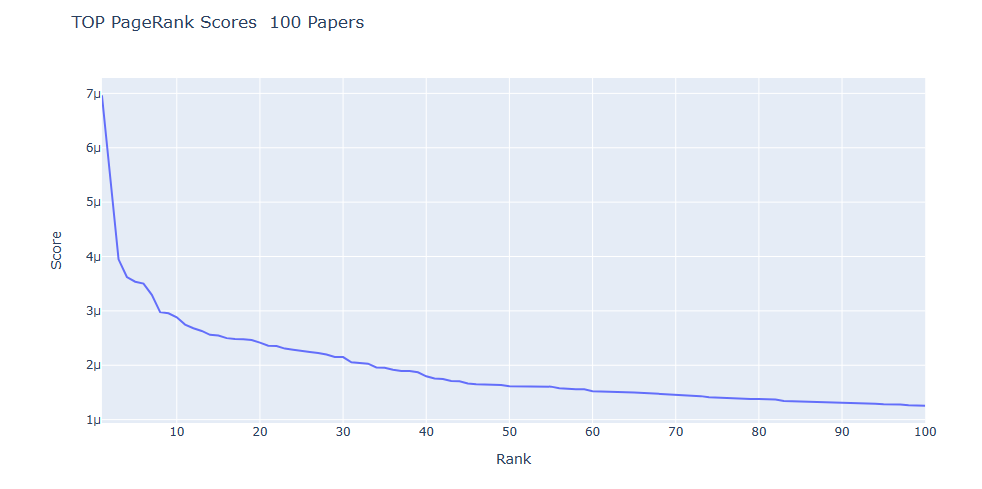